# `Dummy Variables` and Linear Regression

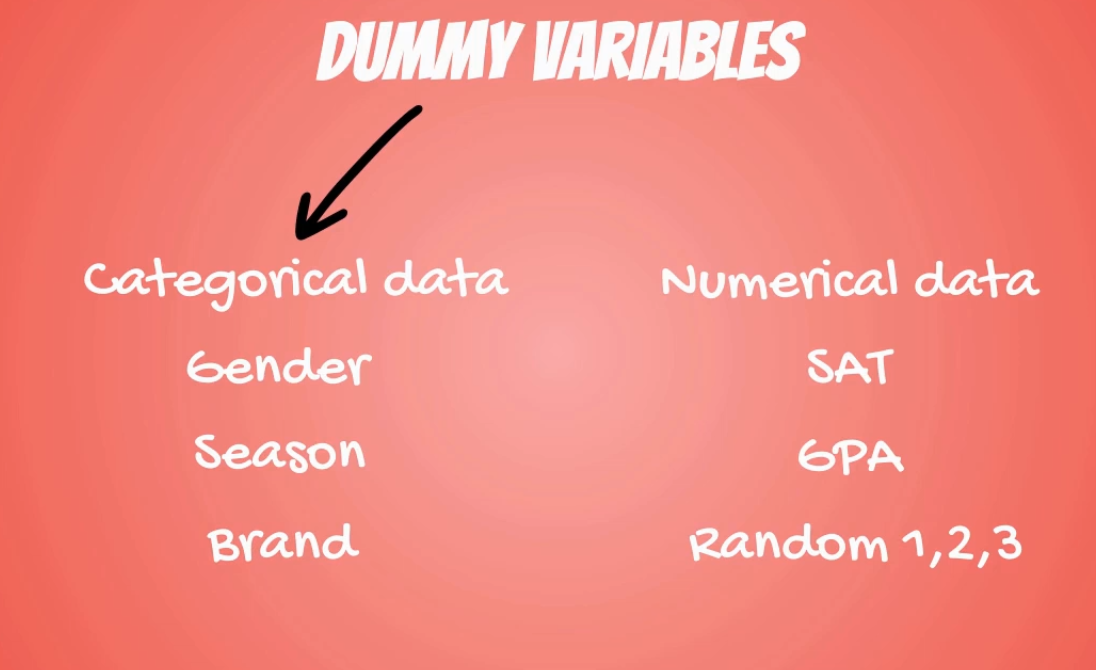



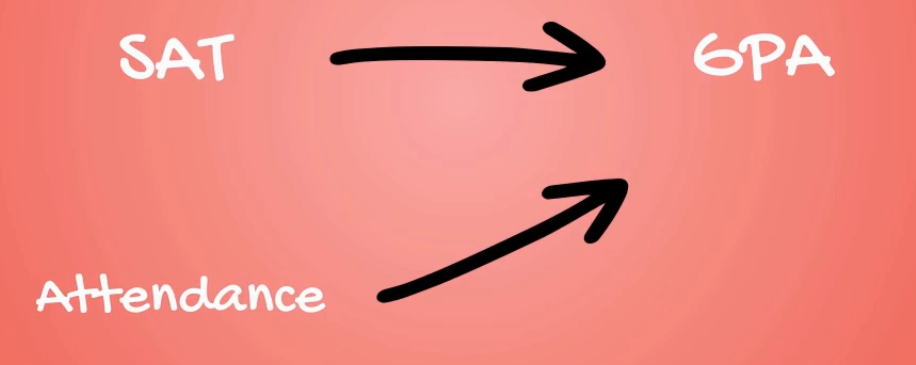

# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('14_1, Dummy variables.csv')

In [4]:

pd.options.display.max_columns=None
pd.options.display.max_rows=None
raw_data

SAT   GPA Attendance
0   1714  2.40         No
1   1664  2.52         No
2   1760  2.54         No
3   1685  2.74         No
4   1693  2.83         No
5   1670  2.91         No
6   1764  3.00         No
7   1764  3.00         No
8   1792  3.01         No
9   1850  3.01         No
10  1735  3.02         No
11  1775  3.07         No
12  1735  3.08         No
13  1712  3.08         No
14  1773  3.12         No
15  1872  3.17        Yes
16  1755  3.17         No
17  1674  3.17        Yes
18  1842  3.17         No
19  1786  3.19        Yes
20  1761  3.19         No
21  1722  3.19         No
22  1663  3.20         No
23  1687  3.21         No
24  1974  3.24         No
25  1826  3.28         No
26  1787  3.28         No
27  1821  3.28         No
28  2020  3.28         No
29  1794  3.28         No
30  1769  3.28         No
31  1934  3.28        Yes
32  1775  3.29         No
33  1855  3.29        Yes
34  1880  3.29         No
35  1849  3.31         No
36  1808  3.32        Yes
37  1954  3.34        Yes
38  1777  3.37        Yes
39  1831  3.37         No
40  1865  3.37         No
41  1850  3.38         No
42  1966  3.38         No
43  1702  3.39        Yes
44  1990  3.39        Yes
45  1925  3.40        Yes
46  1824  3.40        Yes
47  1956  3.40         No
48  1857  3.41         No
49  1979  3.41         No
50  1802  3.41        Yes
51  1855  3.42        Yes
52  1907  3.42         No
53  1634  3.42        Yes
54  1879  3.44        Yes
55  1887  3.47        Yes
56  1730  3.47        Yes
57  1953  3.47         No
58  1781  3.47        Yes
59  1891  3.48        Yes
60  1964  3.49         No
61  1808  3.49         No
62  1893  3.50        Yes
63  2041  3.51         No
64  1893  3.51        Yes
65  1832  3.52        Yes
66  1850  3.52        Yes
67  1934  3.54        Yes
68  1861  3.58        Yes
69  1931  3.58        Yes
70  1933  3.59        Yes
71  1778  3.59        Yes
72  1975  3.60        Yes
73  1934  3.60        Yes
74  2021  3.61        Yes
75  2015  3.62        Yes
76  1997  3.64        Yes
77  2020  3.65         No
78  1843  3.71        Yes
79  1936  3.71        Yes
80  1810  3.71        Yes
81  1987  3.73         No
82  1962  3.76        Yes
83  2050  3.81        Yes

## Map the data

In [5]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})
data

SAT   GPA  Attendance
0   1714  2.40           0
1   1664  2.52           0
2   1760  2.54           0
3   1685  2.74           0
4   1693  2.83           0
5   1670  2.91           0
6   1764  3.00           0
7   1764  3.00           0
8   1792  3.01           0
9   1850  3.01           0
10  1735  3.02           0
11  1775  3.07           0
12  1735  3.08           0
13  1712  3.08           0
14  1773  3.12           0
15  1872  3.17           1
16  1755  3.17           0
17  1674  3.17           1
18  1842  3.17           0
19  1786  3.19           1
20  1761  3.19           0
21  1722  3.19           0
22  1663  3.20           0
23  1687  3.21           0
24  1974  3.24           0
25  1826  3.28           0
26  1787  3.28           0
27  1821  3.28           0
28  2020  3.28           0
29  1794  3.28           0
30  1769  3.28           0
31  1934  3.28           1
32  1775  3.29           0
33  1855  3.29           1
34  1880  3.29           0
35  1849  3.31           0
36  1808  3.32           1
37  1954  3.34           1
38  1777  3.37           1
39  1831  3.37           0
40  1865  3.37           0
41  1850  3.38           0
42  1966  3.38           0
43  1702  3.39           1
44  1990  3.39           1
45  1925  3.40           1
46  1824  3.40           1
47  1956  3.40           0
48  1857  3.41           0
49  1979  3.41           0
50  1802  3.41           1
51  1855  3.42           1
52  1907  3.42           0
53  1634  3.42           1
54  1879  3.44           1
55  1887  3.47           1
56  1730  3.47           1
57  1953  3.47           0
58  1781  3.47           1
59  1891  3.48           1
60  1964  3.49           0
61  1808  3.49           0
62  1893  3.50           1
63  2041  3.51           0
64  1893  3.51           1
65  1832  3.52           1
66  1850  3.52           1
67  1934  3.54           1
68  1861  3.58           1
69  1931  3.58           1
70  1933  3.59           1
71  1778  3.59           1
72  1975  3.60           1
73  1934  3.60           1
74  2021  3.61           1
75  2015  3.62           1
76  1997  3.64           1
77  2020  3.65           0
78  1843  3.71           1
79  1936  3.71           1
80  1810  3.71           1
81  1987  3.73           0
82  1962  3.76           1
83  2050  3.81           1

In [7]:
data.describe().T

count         mean         std     min      25%      50%  \
SAT          84.0  1845.273810  104.530661  1634.0  1772.00  1846.00   
GPA          84.0     3.330238    0.271617     2.4     3.19     3.38   
Attendance   84.0     0.464286    0.501718     0.0     0.00     0.00   

                  75%      max  
SAT         1934.0000  2050.00  
GPA            3.5025     3.81  
Attendance     1.0000     1.00

## Regression

In [8]:
y = data ['GPA']
x1 = data [['SAT','Attendance']]

In [9]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           2.19e-15
Time:                        21:27:34   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The GPA & SAT Model

R-squared : 0.406
Adjusted R-squared : 0.399

## Our Regression Equation: 
$$\widehat{y}= 0.6439 + 0.0014\cdot SAT + 0.2226 \cdot Attendance$$


## Plot the regression line(s) on the scatter plot

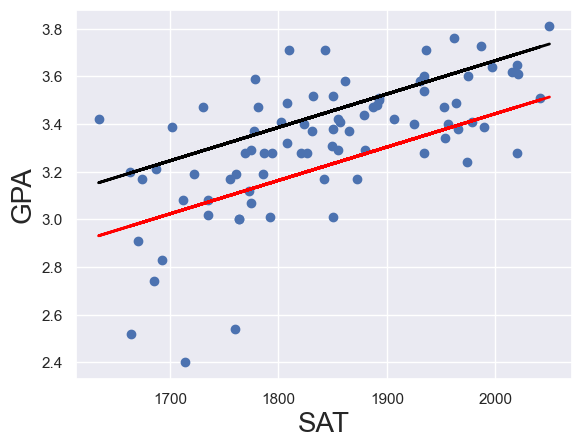

In [16]:
plt.scatter(data['SAT'],y)
#when attendance is 0 :yhat=0.6439+0.0014⋅𝑆𝐴𝑇+0
yhat_no = 0.6439 + 0.0014*data['SAT']
#when attendance is 1 :yhat=0.6439+0.0014⋅𝑆𝐴𝑇+0.2226
yhat_yes = 0.8665 + 0.0014*data['SAT']


fig = plt.plot(data['SAT'],yhat_no, lw=2, c='red')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='black')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Plot the regression line(s) on the scatter plot and color the data points

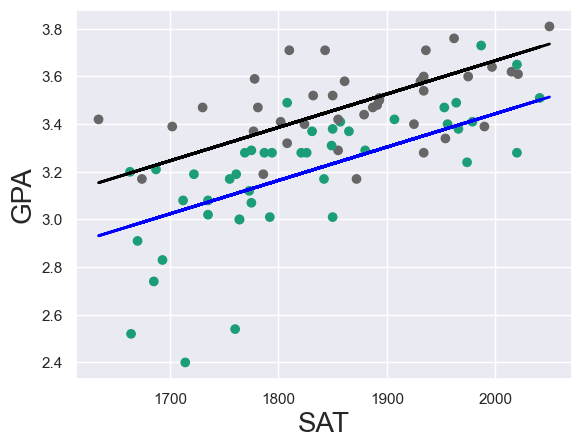

In [17]:
plt.scatter(data['SAT'], data['GPA'], c=data['Attendance'], cmap='Dark2')

yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

fig = plt.plot(data['SAT'],yhat_no, lw=2, c='blue')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='black')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Add the original regression line 

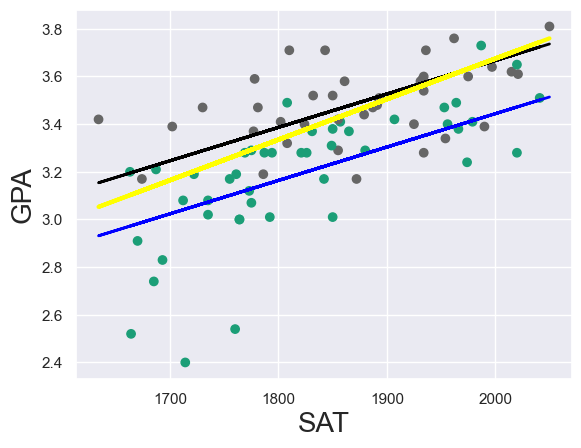

In [18]:

plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='Dark2')

yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

yhat = 0.0017*data['SAT'] + 0.275

fig = plt.plot(data['SAT'],yhat_no, lw=2, c='blue', label ='regression line1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='black', label ='regression line2')

fig = plt.plot(data['SAT'],yhat, lw=3, c='yellow', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# How to make predictions based on the regressions we create

In [19]:
x.head()

const   SAT  Attendance
0    1.0  1714           0
1    1.0  1664           0
2    1.0  1760           0
3    1.0  1685           0
4    1.0  1693           0

## We predict the GPA of two persons, Amin and Eli

In [20]:
new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})
# to appear in our desired order, not alphabetically  
new_data = new_data[['const','SAT','Attendance']]
new_data

const   SAT  Attendance
0      1  1700           0
1      1  1670           1

In [21]:
new_data.rename(index={0: 'Amin',1:'Eli'}, inplace = True)

In [22]:
predictions = results.predict(new_data)
predictions
#type(predictions)

Amin    3.023513
Eli     3.204163
dtype: float64

In [23]:
type(predictions)

pandas.core.series.Series

In [24]:
predictionsdf = pd.DataFrame({'Predictions' : predictions})

joined = new_data.join(predictionsdf)
joined

const   SAT  Attendance  Predictions
Amin      1  1700           0     3.023513
Eli       1  1670           1     3.204163